<a href="https://colab.research.google.com/github/pavitrageez/ML/blob/main/Windingalgo_with_greedytriangles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install geopandas matplotlib pandas numpy scikit-learn shapely

In [11]:
# Finding a point using winding algorithm,construction of greedy triangles. Use the given 6 points : (-2,-1), (5,-2),(5,5),(2,6),(-1,4), (-3,3)

Point (0, 0) is inside the polygon.


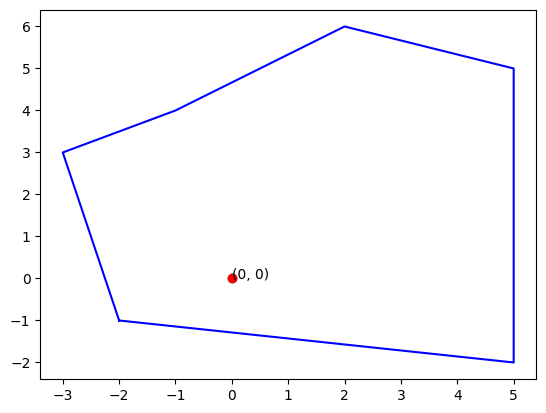

Point (1, 1) is inside the polygon.


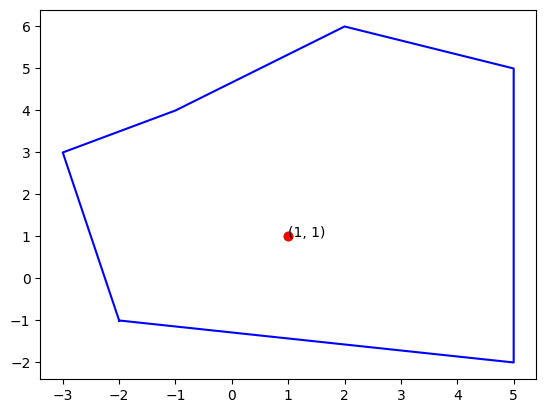

Point (2, 2) is inside the polygon.


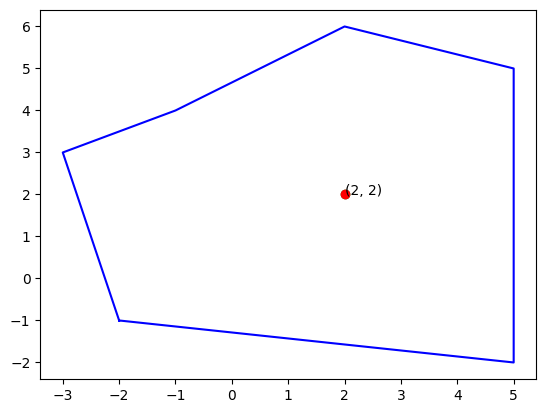

Point (3, 3) is inside the polygon.


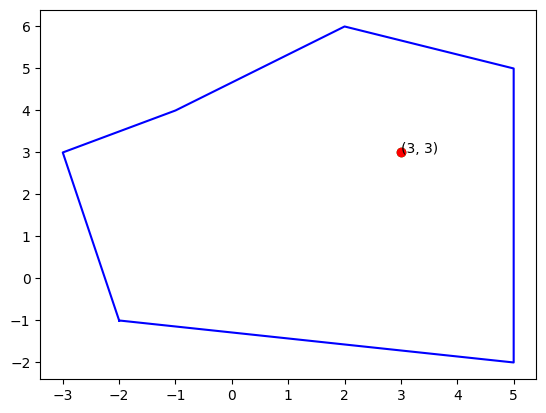

Point (4, 4) is inside the polygon.


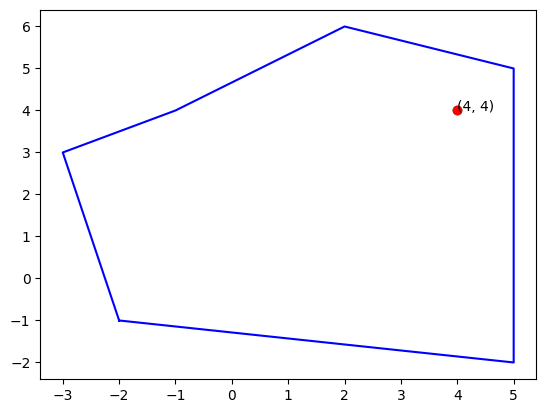

Point (5, 5) is outside the polygon.
Point (6, 6) is outside the polygon.
Point (7, 7) is outside the polygon.
Point (8, 8) is outside the polygon.
Point (9, 9) is outside the polygon.


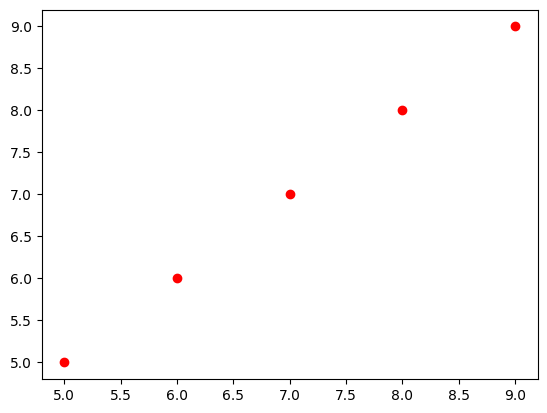

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#Input the points
pts = [(-2,-1), (5,-2), (5,5), (2,6), (-1,4), (-3,3)]
poly = pts + [pts[0]]

#To check the winding
def check_winding(poly, px, py):
    wn = 0
    for i in range(len(poly)-1):
        p1, p2 = poly[i], poly[i+1]
        if p1[1] <= py:
            if p2[1] > py: # Upward crossing
    # Is point to the left of edge?
                if (p2[0]-p1[0])*(py-p1[1]) - (px-p1[0])*(p2[1]-p1[1]) > 0:
                    wn += 1
        else:
            if p2[1] <= py: # Downward crossing
    # Is point to the right of edge?
                if (p2[0]-p1[0])*(py-p1[1]) - (px-p1[0])*(p2[1]-p1[1]) < 0:
                    wn -= 1
    return wn

# Print the polygon and point if winding is inside or outside using all test points and show the direction of the winding

#TESTING
# List the test points
test_points = [(0, 0), (1, 1), (2, 2), ( 3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9)]
#print if test points are inside or outside
for px, py in test_points:
    wn = check_winding(poly, px, py)
    if wn == 0:
        print(f"Point ({px}, {py}) is outside the polygon.")
        plt.plot(px, py, 'ro')
    else:
        print(f"Point ({px}, {py}) is inside the polygon.")
        plt.plot(px, py, 'go')
        plt.annotate(f"({px}, {py})", (px, py))
        plt.plot([p[0] for p in poly], [p[1] for p in poly], 'b-')
        plt.plot(px, py, 'ro')
        plt.show()


The point is inside the polygon
The winding is clockwise


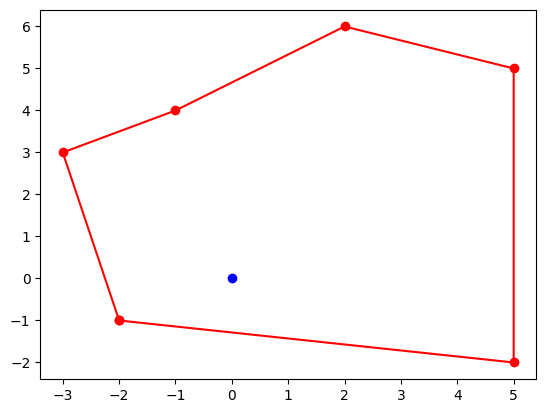

In [4]:
#ACTUAL OUTPUT
#Now print the polygon for the given point
px, py = 0, 0
wn = check_winding(poly, px, py)
if wn == 0:
    print("The point is outside the polygon")
else:
    print("The point is inside the polygon")
    if wn > 0:
        print("The winding is clockwise")
    else:
        print("The winding is counterclockwise")

#Plot
plt.plot([p[0] for p in poly], [p[1] for p in poly], 'ro-')
plt.plot(px, py, 'bo')
plt.show()


# For winding algorithm, if wn != 0 , the point is inside the polygon
# if wn = 0  , the point is outside the polygon




Greedy diagonals (index): [(0, 4), (2, 4), (1, 4)]
Greedy diagonals (points): [((-2, -1), (-1, 4)), ((5, 5), (-1, 4)), ((5, -2), (-1, 4))]


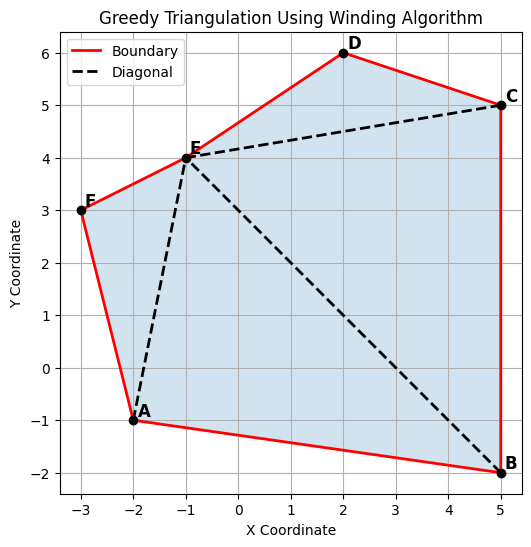

In [10]:

# GREEDY TRIANGULATION (after winding)
import math

n = len(pts)

# helper: distance
def dist(p1, p2):
    return math.hypot(p1[0]-p2[0], p1[1]-p2[1])

# orientation + segment intersection (robust)
def orient(a, b, c):
    val = (b[0]-a[0])*(c[1]-a[1]) - (b[1]-a[1])*(c[0]-a[0])
    if abs(val) < 1e-12:
        return 0
    return 1 if val > 0 else -1

def on_segment(a, b, c):
    return (min(a[0], b[0]) - 1e-12 <= c[0] <= max(a[0], b[0]) + 1e-12 and
            min(a[1], b[1]) - 1e-12 <= c[1] <= max(a[1], b[1]) + 1e-12)

def segments_intersect(p1, p2, q1, q2):
    o1 = orient(p1, p2, q1)
    o2 = orient(p1, p2, q2)
    o3 = orient(q1, q2, p1)
    o4 = orient(q1, q2, p2)

    if o1 != o2 and o3 != o4:
        return True

    if o1 == 0 and on_segment(p1, p2, q1): return True
    if o2 == 0 and on_segment(p1, p2, q2): return True
    if o3 == 0 and on_segment(q1, q2, p1): return True
    if o4 == 0 and on_segment(q1, q2, p2): return True

    return False

def share_endpoint(seg1, seg2):
    a, b = seg1
    c, d = seg2
    return (a == c) or (a == d) or (b == c) or (b == d)

# point-in-polygon using winding function
def point_in_polygon(p):
    return check_winding(poly, p[0], p[1]) != 0

# polygon boundary edges
edges = [(pts[i], pts[(i+1) % n]) for i in range(n)]

# generate candidate diagonals (skip adjacent)
candidates = []
for i in range(n):
    for j in range(i+1, n):
        if abs(i-j) == 1 or abs(i-j) == n-1:
            continue
        candidates.append((i, j))

# sort by length (greedy)
candidates.sort(key=lambda ij: dist(pts[ij[0]], pts[ij[1]]))

selected = []  # store selected diagonals as index pairs (i,j)

def diagonal_valid(i, j):
    a, b = pts[i], pts[j]

    # midpoint should be inside polygon (simple inside check)
    mid = ((a[0]+b[0])/2.0, (a[1]+b[1])/2.0)
    if not point_in_polygon(mid):
        return False

    # must not intersect boundary edges (except shared endpoints)
    for e in edges:
        if share_endpoint((a, b), e):
            continue
        if segments_intersect(a, b, e[0], e[1]):
            return False

    # must not intersect previously selected diagonals (except shared endpoints)
    for (k, l) in selected:
        c, d = pts[k], pts[l]
        if share_endpoint((a, b), (c, d)):
            continue
        if segments_intersect(a, b, c, d):
            return False
    return True

need = n - 3  # diagonals needed
for i, j in candidates:
    if diagonal_valid(i, j):
        selected.append((i, j))
    if len(selected) == need:
        break

print("Greedy diagonals (index):", selected)
print("Greedy diagonals (points):", [(pts[i], pts[j]) for i, j in selected])


# PLOT
poly_np = np.array(poly)
plt.figure(figsize=(8, 6))
plt.title("Greedy Triangulation Using Winding Algorithm")

# fill polygon (light)
plt.fill(poly_np[:, 0], poly_np[:, 1], alpha=0.2)

# boundary (black)
plt.plot(poly_np[:, 0], poly_np[:, 1], 'r-', linewidth=2, label="Boundary")

# diagonals (red dashed)
first_diag = True
for (i, j) in selected:
    a, b = pts[i], pts[j]
    plt.plot([a[0], b[0]], [a[1], b[1]],
             'k--', linewidth=2,
             label="Diagonal" if first_diag else None)
    first_diag = False

labels = ['A', 'B', 'C', 'D', 'E', 'F']

for idx, (x, y) in enumerate(pts):
    plt.plot(x, y, 'ko')
    plt.text(x + 0.08, y + 0.08, labels[idx],
             fontsize=12, weight='bold')


plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.show()


